# Multiple Disease prediction

## Objective

The objective of this project is to analyze a blood sample dataset with 24 features to predict whether an individual is "healthy" or "not healthy" based on specific blood parameters. The dataset, which was created for educational purposes, reflects various diseases associated with high or low values of these parameters. After performing data cleaning and exploratory analysis, a Guassian Naive Bayes classifier is used to predict the health status of individuals. Additionally, the performance of the model is evaluated both before and after dimensionality reduction using Principal Component Analysis (PCA), aiming to improve prediction accuracy and model interpretability.



Note: Libraries are imported at the time of requirement only.

## Dataset Description

Two datasets are provided:

1. **Training Data**
2. **Testing Data**


Features of the Dataset:

- **Cholesterol**: The level of cholesterol in the blood, measured in milligrams per deciliter (mg/dL).
- **Hemoglobin**: The protein in red blood cells that carries oxygen from the lungs to the rest of the body.
- **Platelets**: Blood cells that assist in clotting.
- **White Blood Cells (WBC)**: Cells of the immune system that help fight infections.
- **Red Blood Cells (RBC)**: Cells that carry oxygen from the lungs to the rest of the body.
- **Hematocrit**: The percentage of blood volume occupied by red blood cells.
- **Mean Corpuscular Volume (MCV)**: The average volume of red blood cells.
- **Mean Corpuscular Hemoglobin (MCH)**: The average amount of hemoglobin in a red blood cell.
- **Mean Corpuscular Hemoglobin Concentration (MCHC)**: The average concentration of hemoglobin in a red blood cell.
- **Insulin**: A hormone that helps regulate blood sugar levels.
- **Body Mass Index (BMI)**: A measure of body fat based on height and weight.
- **Systolic Blood Pressure (SBP)**: The pressure in the arteries when the heart beats.
- **Diastolic Blood Pressure (DBP)**: The pressure in the arteries when the heart is at rest between beats.
- **Triglycerides**: A type of fat found in the blood, measured in milligrams per deciliter (mg/dL).
- **HbA1c (Glycated Hemoglobin)**: A measure of average blood sugar levels over the past two to three months.
- **LDL (Low-Density Lipoprotein) Cholesterol**: The "bad" cholesterol that can build up in the arteries.
- **HDL (High-Density Lipoprotein) Cholesterol**: The "good" cholesterol that helps remove LDL cholesterol from the arteries.
- **ALT (Alanine Aminotransferase)**: An enzyme found primarily in the liver.
- **AST (Aspartate Aminotransferase)**: An enzyme found in various tissues, including the liver and heart.
- **Heart Rate**: The number of heartbeats per minute (bpm).
- **Creatinine**: A waste product produced by muscles, filtered out of the blood by the kidneys.
- **Troponin**: A protein released into the bloodstream when there is damage to the heart muscle.
- **C-reactive Protein (CRP)**: A marker of inflammation in the body.
- **Disease**: A label indicating whether the person has a specific disease or not.


# 1. Load dataset

In [45]:
# Load dataset

import pandas as pd
training_data = pd.read_csv('multiple_disease_dataset/training_data.csv')
testing_data = pd.read_csv('multiple_disease_dataset/testing_data.csv')

# 2. Dataset overview

## 2.1 Initial data inspection
Let's look at first five rows of training and testing data.

In [2]:
training_data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [3]:
testing_data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,Thalasse
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,Diabetes
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,Heart Di
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,Diabetes
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,Heart Di


- There are first x columns of features and last column is of Disease indicator, which will be our target vector.

## 2.2 Dataset basic informoation

Let's look one step deeper into the basic info of training data.

In [4]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

- Total row entries = 2351  
- Total columns = 25
  - Features = 24
  - Target variable = 1
- Datatype of entries = 24 float64 and one object type(str)
- No null entries.

## 2.3 Dataset summary statistics

Let's look into the statistics of our data i.e. min, max, quantiles, occurrence etc.

In [5]:
training_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Glucose,2351.0,NaN,NaN,NaN,0.362828,0.251889,0.010994,0.129198,0.351722,0.582278,0.96846
Cholesterol,2351.0,NaN,NaN,NaN,0.393648,0.239449,0.012139,0.195818,0.397083,0.582178,0.905026
Hemoglobin,2351.0,NaN,NaN,NaN,0.58619,0.271498,0.003021,0.346092,0.609836,0.791215,0.983306
Platelets,2351.0,NaN,NaN,NaN,0.504027,0.303347,0.012594,0.200865,0.533962,0.754841,0.999393
White Blood Cells,2351.0,NaN,NaN,NaN,0.511086,0.27727,0.010139,0.259467,0.527381,0.743164,0.990786
Red Blood Cells,2351.0,NaN,NaN,NaN,0.50659,0.266565,0.044565,0.263589,0.467431,0.74367,1.0
Hematocrit,2351.0,NaN,NaN,NaN,0.507152,0.285537,0.011772,0.288132,0.493428,0.753657,0.97752
Mean Corpuscular Volume,2351.0,NaN,NaN,NaN,0.4922,0.275735,0.046942,0.287532,0.453052,0.722293,0.995263
Mean Corpuscular Hemoglobin,2351.0,NaN,NaN,NaN,0.484459,0.315618,0.000554,0.207938,0.420723,0.77816,0.963235
Mean Corpuscular Hemoglobin Concentration,2351.0,NaN,NaN,NaN,0.562273,0.273281,0.006947,0.355774,0.603635,0.741381,0.975586


- All the values are scaled between 0-1.
- Disease column is object type with 5 unique categories.
- Maximum occurred disease: Anemia with 623 cases.
- The SD of all the features seems to be around 0.25, which points towards a balanced dataset or the uniform scaling.

# 3. Data Preprocessing

## 3.1 Encode categorical data
- Healthy = 0
- Any disease = 1

In [6]:
training_data['Disease'] = [0 if (i=='Healthy') else 1
                            for i in training_data['Disease']]

## 3.2 Handle missing values 

In [7]:
training_data.isnull().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

- No null values present. But there can be values that are filled irrationally with 0.

In [8]:
(training_data==0).any().sum()

np.int64(1)

- No entry has 0.0, seems that our data is authentic.

## 3.3 Check for duplicates

In [9]:
# Check for duplicates

training_data.duplicated().sum()

np.int64(2286)

- Out of 2351 entries, 2286 are duplicates.
- We must drop them because:
  1. Duplicates will generate bias in the model due to overrepresentation of some data.
  2. It can cause problem of overfitting
  3. It is not a proper dataset to visulaize upon
  4. It will result in distorted statistical metrics like correlations, mean, SD etc

In [10]:
# Drop duplicates

training_data.drop_duplicates(inplace=True)

In [11]:
training_data.shape

(65, 25)

- Now our training data has 65 unique entries.

## 3.4 Separate numerical data with categorical data

In [12]:
numerical_data = training_data.drop(columns='Disease')
categorical_data = training_data['Disease']

## 3.5 Check for outliers

- We can find lower bound and upper bound for outlier detection using:
  1. IQR : 

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

  2. Z-score:
   
            Z= (X−μ)/ σ 
            Lower Bound: 𝜇−3×𝜎
            Upper Bound: 𝜇+3×𝜎

​
  
      
   
  

- Let's try with both methods.

In [13]:
# Outlier detection using IQR

q1 = numerical_data.quantile(0.25)
q3 = numerical_data.quantile(0.75)
IQR = q3-q1
LB_iqr = q1- (1.5*IQR)
UB_iqr = q3+ (1.5*IQR)

outliers_iqr = ((numerical_data < LB_iqr) | (numerical_data > UB_iqr)).sum()
print(f"{outliers_iqr=}")

outliers_iqr=Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0


- According to IQR outlier testing, there are no outliers in the dataset.

In [14]:
# Outlier detection using Z-score
from scipy import stats
import numpy as np

z_score = stats.zscore(numerical_data)
z_abs = np.abs(z_score)

outliers_z = numerical_data[z_abs>3].sum()
print(f"{outliers_z=}")


outliers_z=Glucose                                      0.0
Cholesterol                                  0.0
Hemoglobin                                   0.0
Platelets                                    0.0
White Blood Cells                            0.0
Red Blood Cells                              0.0
Hematocrit                                   0.0
Mean Corpuscular Volume                      0.0
Mean Corpuscular Hemoglobin                  0.0
Mean Corpuscular Hemoglobin Concentration    0.0
Insulin                                      0.0
BMI                                          0.0
Systolic Blood Pressure                      0.0
Diastolic Blood Pressure                     0.0
Triglycerides                                0.0
HbA1c                                        0.0
LDL Cholesterol                              0.0
HDL Cholesterol                              0.0
ALT                                          0.0
AST                                          0.0
Heart Rat

- No outliers are present in the dataset.

## 3.5 Check for imbalanced data

- It is important to note that the data is well balanced with healthy and non-healthy data entries.
- If target variable is imbalanced highly, then model will be biased towards predicting more frequent class.

In [15]:
# Check for class imbalance

training_data.groupby('Disease').count()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
Disease,,,,,,,,,,,,,,,,,,,,,
0,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
1,49,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,49,49,49


- We can see here that class data are highly imbalanced in numbers.
- Dataset has only 16 entries for 'Healthy' class and more than 3x for 'Not Healthy' class.
- We will balance the data using SMOTE (Synthetic minority over-sampling technique).
  - It creates new data entries for imbalanced class using nearest neighbour interpolation.

In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
numerical_data_rs, categorical_data_rs = smote.fit_resample(numerical_data, categorical_data)
training_data_rs = pd.concat([numerical_data_rs, categorical_data_rs], axis=1)

In [17]:
# Check the class distribution again
training_data_rs.groupby('Disease').count()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
Disease,,,,,,,,,,,,,,,,,,,,,
0,49,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,49,49,49
1,49,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,49,49,49


- The classes seems balanced now.

# 4. EDA

## 4.1 Feature distibution

In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set_theme()

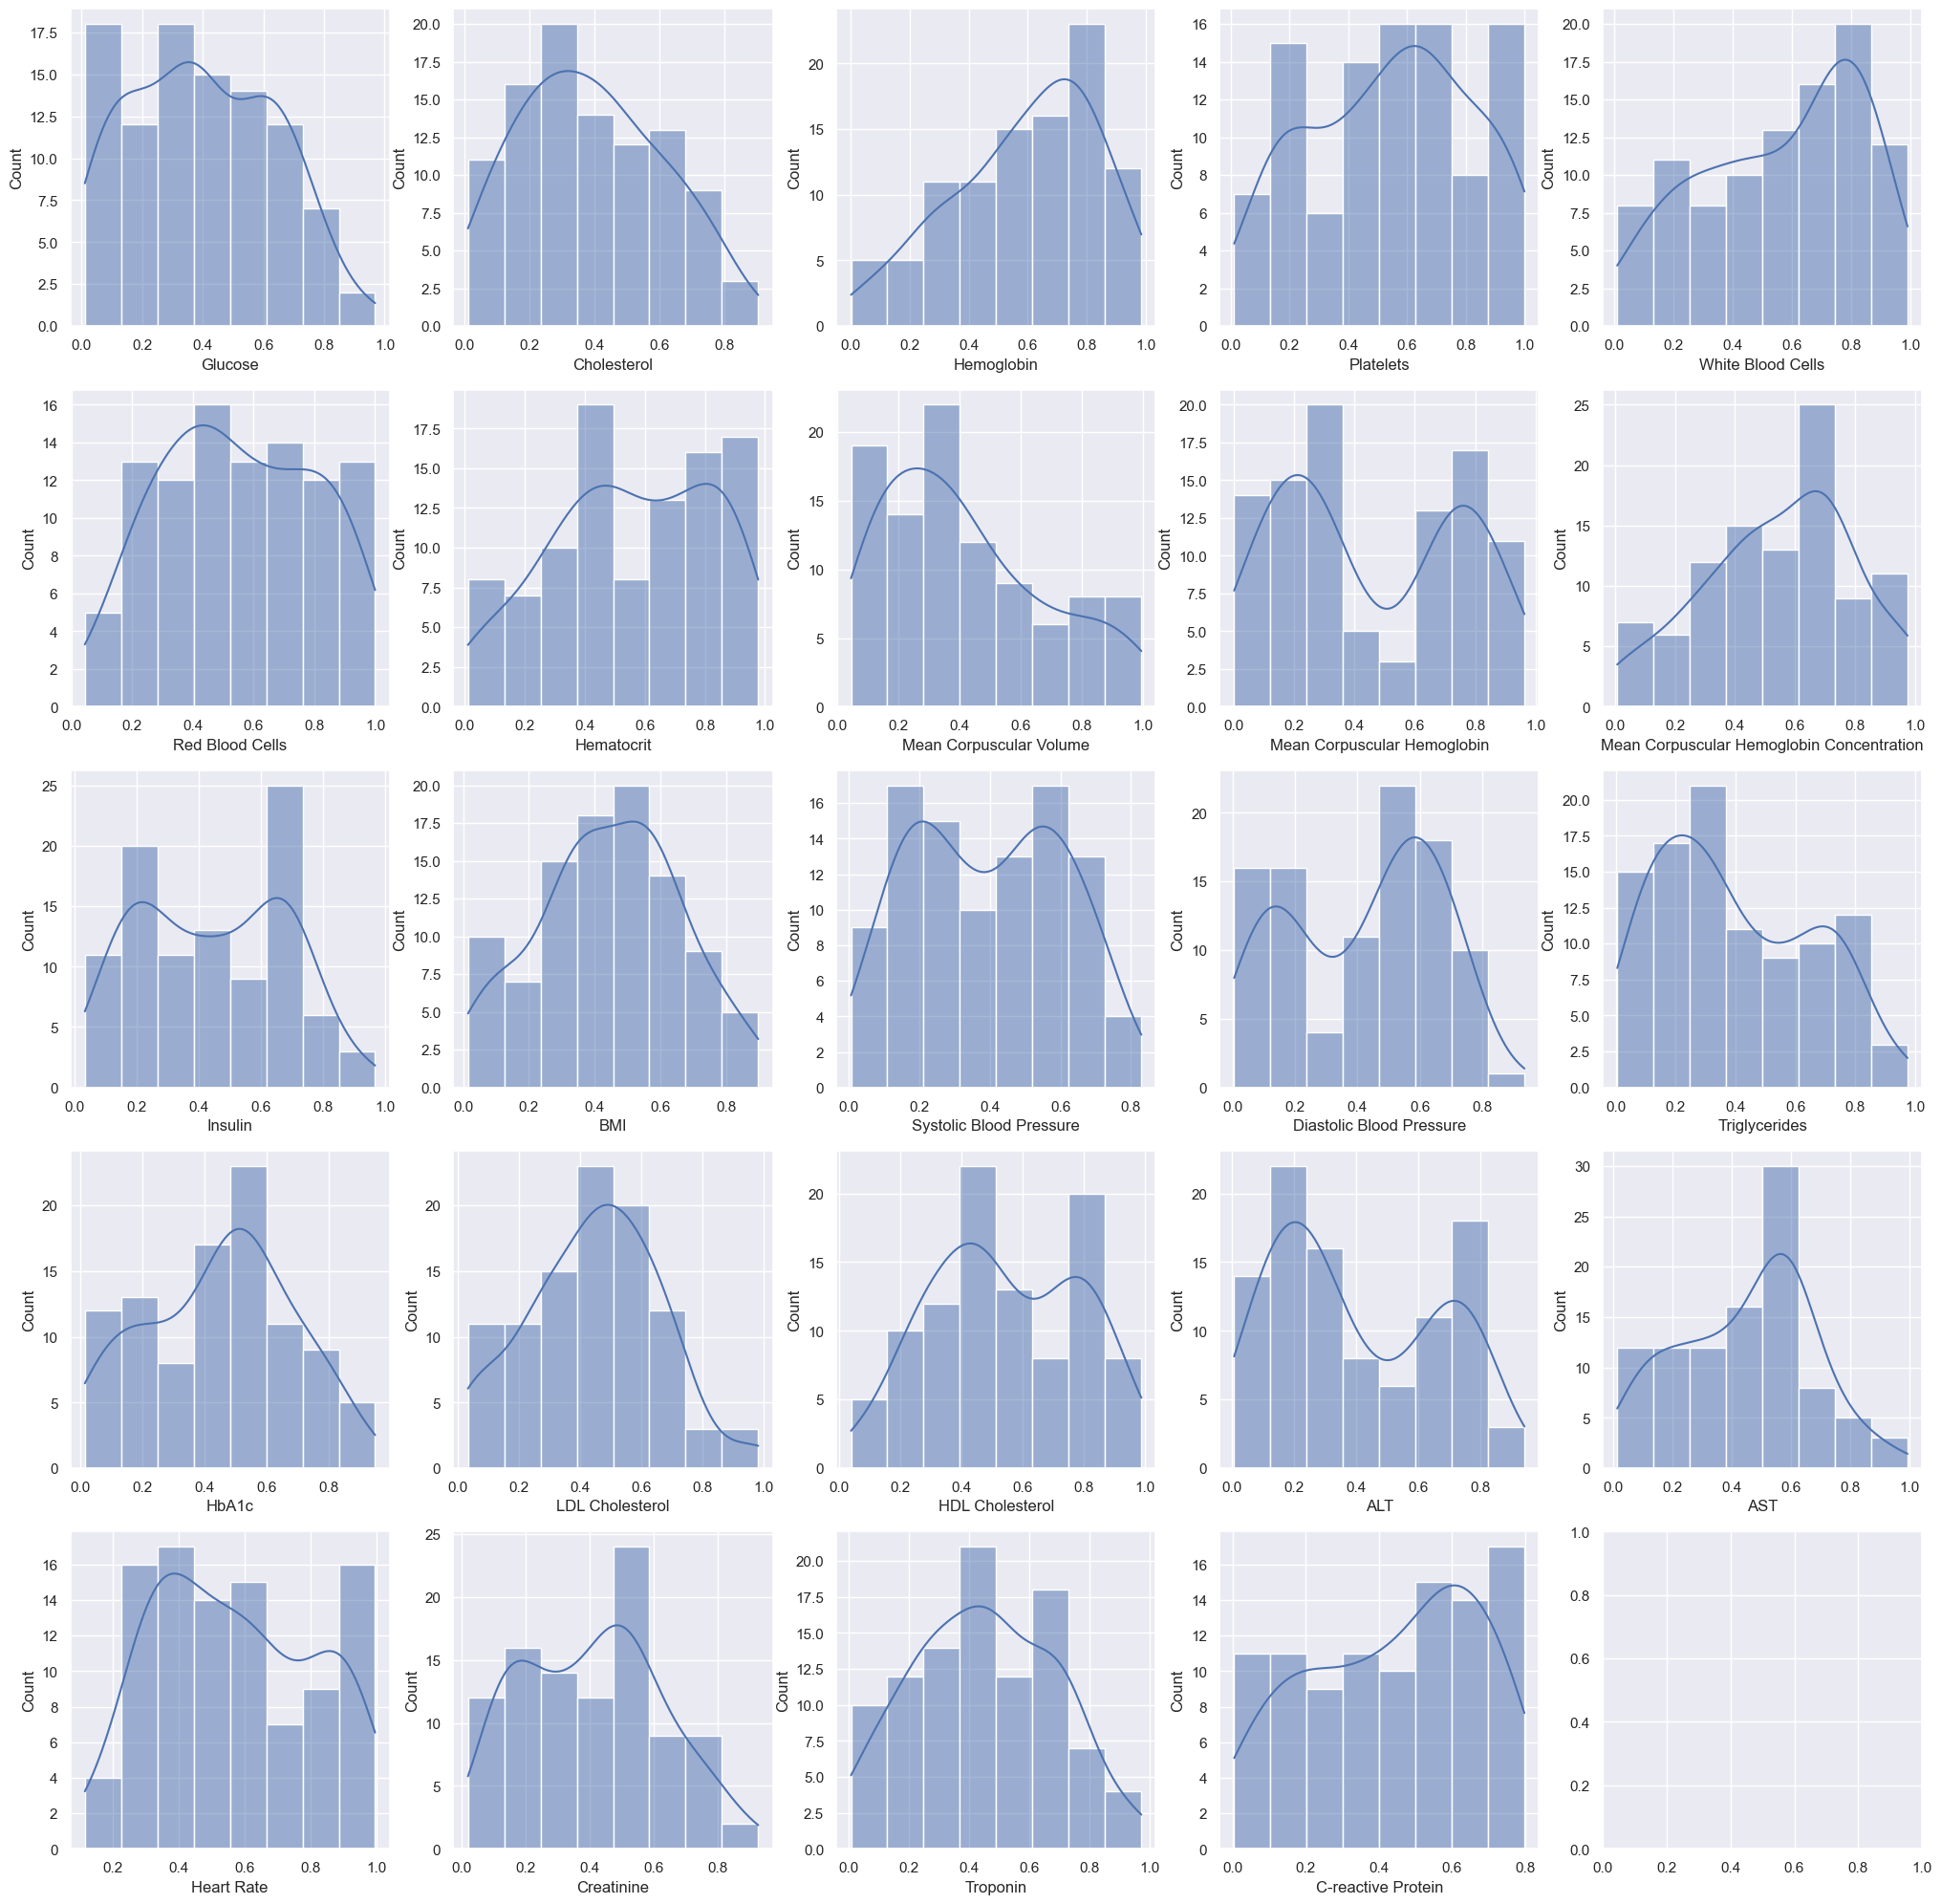

In [19]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize= (25,25))
axes = axes.flatten()
for i, col in enumerate(numerical_data_rs.columns):
    sns.histplot(numerical_data_rs[col], kde=True, ax =axes[i])

plt.show()

- The kde plots here show that the features follow a guassian distribution.

## 4.2 Feature dependency

- If the features are independent or dependent, can be analysed using correlation.
- For visualization, we can also plot pairplots.

In [20]:
# Find correlation matrix
corr = (numerical_data_rs).corr()

# Maximum correlation except 1 
corr[corr!=1].max()

Glucose                                      0.330806
Cholesterol                                  0.297290
Hemoglobin                                   0.262617
Platelets                                    0.212050
White Blood Cells                            0.257842
Red Blood Cells                              0.280744
Hematocrit                                   0.256623
Mean Corpuscular Volume                      0.232544
Mean Corpuscular Hemoglobin                  0.210402
Mean Corpuscular Hemoglobin Concentration    0.232544
Insulin                                      0.342104
BMI                                          0.330806
Systolic Blood Pressure                      0.265376
Diastolic Blood Pressure                     0.320553
Triglycerides                                0.257842
HbA1c                                        0.223854
LDL Cholesterol                              0.262617
HDL Cholesterol                              0.280744
ALT                         

In [21]:
# Features with correlation greater than 0.5 in positive and negative direction.
features = []
for j, col in enumerate(numerical_data_rs.columns):
    for i, row in enumerate(numerical_data_rs.columns):
        if (i != j) and ((corr.iloc[i, j]<-0.5) | (corr.iloc[i, j]>0.5)):
                features.append(col)
                features.append(row)

dependent_features = set(features)
print(f"{dependent_features=}")


dependent_features=set()


- All the features seem independent -- with no correlation above 0.5.

## 4.3 Central tendency of data


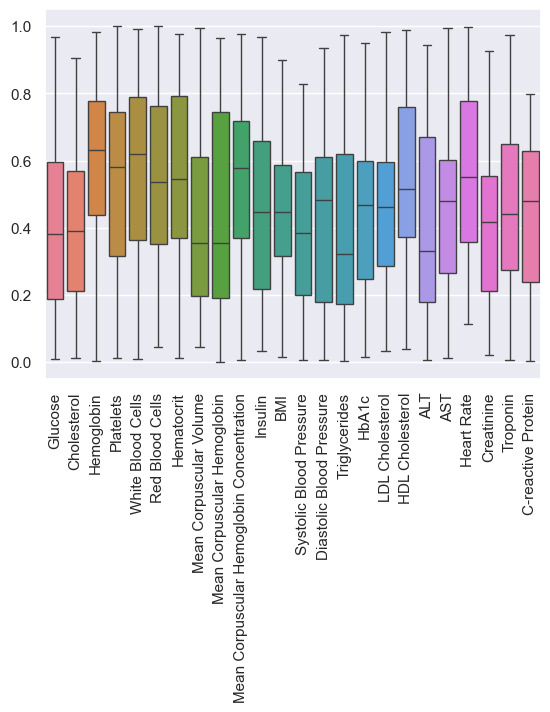

In [22]:
sns.boxplot(numerical_data_rs)
plt.xticks(rotation = 90)
plt.show()

- No outlier outside whiskers.

# 5. Dimensionality Reduction

## 5.1 Find optimal size of dimensions

In [31]:
# Fit the training data on a PCA model

from sklearn.decomposition import PCA 

pca = PCA()

pca.fit(training_data_rs)

PCA()

- To find optimal number of features for PCA, lets plot cumulative variance ratio.

In [37]:
# Explained variance % of each feature
pca.explained_variance_ratio_

array([0.18736262, 0.09871604, 0.07361968, 0.0697535 , 0.06178314,
       0.05541894, 0.05123721, 0.04359217, 0.04104701, 0.03794975,
       0.0359272 , 0.03277662, 0.02936212, 0.02468952, 0.02453895,
       0.02261895, 0.02097675, 0.01777207, 0.01549767, 0.01316426,
       0.01254431, 0.01053506, 0.00718693, 0.00615826, 0.00577128])

<>:3: SyntaxWarning: invalid escape sequence '\%'
<>:3: SyntaxWarning: invalid escape sequence '\%'
/var/folders/8y/my0b9w1110ldvlp3dqjw_49h0000gn/T/ipykernel_48270/1941429812.py:3: SyntaxWarning: invalid escape sequence '\%'
  plt.ylabel('\% of cumulative explained variance')


Text(0, 0.5, '\\% of cumulative explained variance')

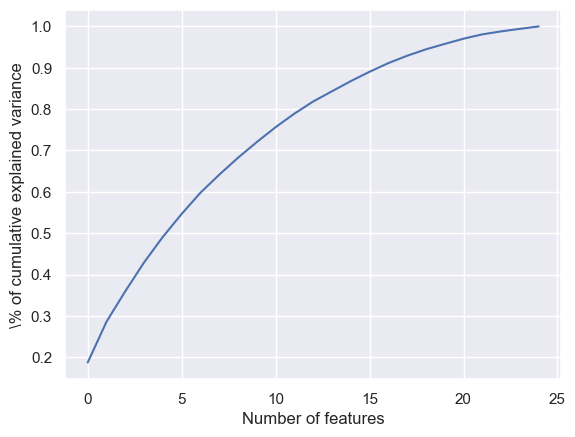

In [35]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of features')
plt.ylabel('\% of cumulative explained variance')


- 90% of variance is captured by 15 features. So, let's reduce the features to 15.

## 5.2 Perform PCA 

- PCA on testing data.

In [106]:
pca1 = PCA(n_components=20)
numerical_data_rs_pca = pca1.fit_transform(numerical_data_rs)
numerical_data_rs_pca.shape   # Fetaures reduced to 15

(98, 20)

- PCA on testing_data

In [107]:
testing_data_num = testing_data.drop(columns='Disease')

In [108]:
testing_data_num_pca = pca1.transform(testing_data_num)

# 6. Model building

## 6.1 Split data into training and test sets

In [109]:
# Without PCA 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(numerical_data_rs, categorical_data_rs)

In [110]:
# With PCA data

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(numerical_data_rs_pca, categorical_data_rs)

## 6.2 Building Naive Bayes model
- Our data fetaures are independent, as we have seen.
- Features follow a gaussian distribution.
- This qualifies for a Naive bayes model generation.
- Let's generate the train the model and find accuracy.
- We will train model for the training datasets with and without the PCA.


In [111]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)   # Fit training data

GaussianNB()

In [112]:
y_pred = model.predict(X_test)   # Predict values on test set

In [113]:
# Accuracy prediction for dataset without PCA

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy without PCA: {acc*100}%")

Accuracy without PCA: 72.0%


In [114]:
# Classification report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.82      0.64      0.72        14\n           1       0.64      0.82      0.72        11\n\n    accuracy                           0.72        25\n   macro avg       0.73      0.73      0.72        25\nweighted avg       0.74      0.72      0.72        25\n'

In [115]:
# Confusion matrix

confusion_matrix(y_test, y_pred)

array([[9, 5],
       [2, 9]])

<Axes: >

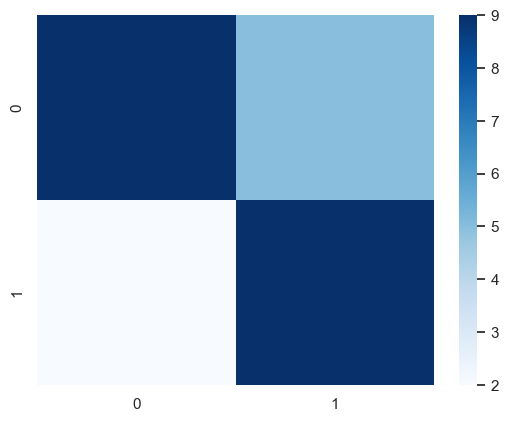

In [116]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='Blues')

In [117]:
# Fit Dataset with PCA

model_pca = GaussianNB()
model_pca.fit(X_train_pca, y_train_pca)

GaussianNB()

In [127]:
y_pred_pca= model_pca.predict(X_test_pca)

acc_pca = accuracy_score(y_pred_pca, y_test_pca)

print(f"Accuracy with PCA: {acc_pca*100}%")

Accuracy with PCA: 88.0%


In [119]:
classification_report(y_test_pca, y_pred_pca)

'              precision    recall  f1-score   support\n\n           0       1.00      0.80      0.89        15\n           1       0.77      1.00      0.87        10\n\n    accuracy                           0.88        25\n   macro avg       0.88      0.90      0.88        25\nweighted avg       0.91      0.88      0.88        25\n'

In [120]:
cnf_mat= confusion_matrix(y_pred_pca,y_test_pca)

<Axes: >

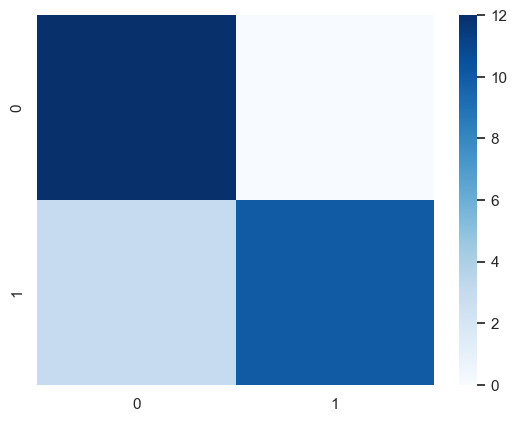

In [121]:
sns.heatmap(cnf_mat,cmap='Blues')

## 6.3 Prediction on testing_data

### Without PCA

In [122]:
testing_data_pred= model.predict(testing_data_num)

In [123]:
testing_data['Disease'] = [0 if i == 'Healthy' else 1 for i in testing_data['Disease']]

In [129]:
acc_testing = accuracy_score(testing_data_pred, testing_data['Disease'])

print(f"Accuracy for testing data without PCA: {acc_testing*100}%")

Accuracy for testing data without PCA: 95.47325102880659%


### With PCA

In [125]:
testing_data_pred_pca = model_pca.predict(testing_data_num_pca)

In [128]:
acc_testing_pca = accuracy_score(testing_data_pred_pca, testing_data['Disease'])
print(f"Accuracy for testing data with PCA: {acc_testing_pca*100}%")

Accuracy for testing data with PCA: 98.97119341563786%


## 6.4 Plots

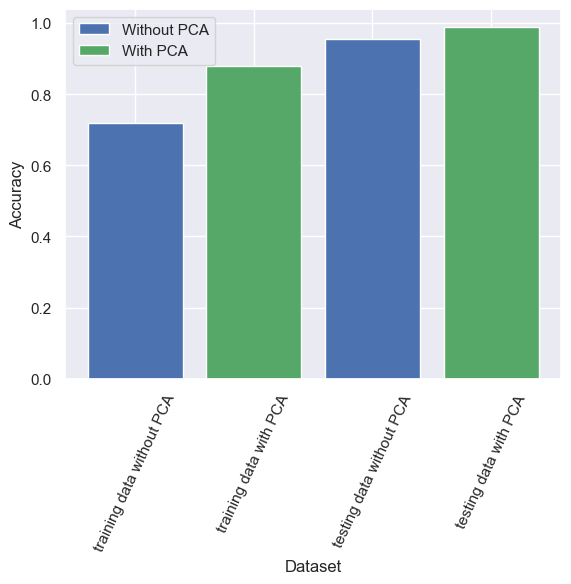

In [170]:
data = ['training data without PCA', 'training data with PCA' ,'testing data without PCA', 'testing data with PCA']

accuracies = [acc, acc_pca, acc_testing, acc_testing_pca]

labels = ['Without PCA', 'With PCA', 'Without PCA', 'With PCA' ]

# plt.figure(figsize=(5,5))
plt.bar(data, accuracies, color=['b', 'g', 'b', 'g'], label=labels )
plt.xticks(rotation = 65)
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.legend(labels[:2])
